### Real World

### Scenario

I want to measure the "On Time Delivery" performance of delivery of Products to our customers to determine if we are hitting the commitments communicated at the time of ordering.

* We ship 4 product offerings : LowEnd, Good, Better, Super
* There is a manufacturing lead time target on each in days: 2, 3, 3, 4
* We supply 5 countries: UK, Germany, France, Netherlands, Spain.
* There is a logistics lead time target on each in days: 2, 4, 3, 3, 5
* Target to hit "On Time Delivery" is to come in under Manufacturing + Logistics Lead time

The idea is to determine how we are performing to the target Lead times promised
Where we are off target what are the factors and do we need to change the commitments to the customer? 


### Creating the Dataset 

https://www.youtube.com/watch?v=hUes6y2b--0

In [66]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd

### Creating a Dataframe

Using this as a refernece point and study aid
https://pandas.pydata.org/pandas-docs/stable/10min.html#object-creation

In order to simulate the required data a number of steps are to be folloed initially.
1. Create an empty Dataframe of 200 sample size
2. Popupaulte each column with generated data to build a table to be used later to investigate the dataset.

    ### Using Date Time as an Index converts the entire Dataframe into a TIme Series. date range gives a series of time stamps.
    https://campus.datacamp.com/courses/manipulating-time-series-data-in-python/working-with-time-series-in-pandas?ex=1

In [67]:
# index creation
ind= pd.date_range(start="2018-09-29", periods=25,freq="D")

In [68]:
ind

DatetimeIndex(['2018-09-29', '2018-09-30', '2018-10-01', '2018-10-02',
               '2018-10-03', '2018-10-04', '2018-10-05', '2018-10-06',
               '2018-10-07', '2018-10-08', '2018-10-09', '2018-10-10',
               '2018-10-11', '2018-10-12', '2018-10-13', '2018-10-14',
               '2018-10-15', '2018-10-16', '2018-10-17', '2018-10-18',
               '2018-10-19', '2018-10-20', '2018-10-21', '2018-10-22',
               '2018-10-23'],
              dtype='datetime64[ns]', freq='D')

In [69]:
df2=pd.DataFrame(np.random.poisson(2,len(ind)),index=ind,columns=['Order_Date'])
df2.head(3)

,Order_Date
2018-09-29,0
2018-09-30,4
2018-10-01,3


In [70]:
df = pd.DataFrame(columns=['Product','Country','MLT','LLT'],index=range(1,200))
df.head(3)
#https://cmdlinetips.com/2018/01/how-to-create-pandas-dataframe-from-multiple-lists/

,Product,Country,MLT,LLT
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN


https://math.stackexchange.com/questions/1335829/default-positive-non-negative-probability-distribution
Similarly, SAT (and other) exam scores are sometimes described as normal, totally ignoring the minuscule probability that would correspond to nonexistent negative scores.

The gamma family of distributions places all its probability on the positive half-line. Gamma distributions are right-skewed with mode < median < mean. The shape is governed by a shape parameter.

Exponential distributions are members of this family with shape parameter 1; strongly skewed with no left sided tail. For larger shape parameters the distribution has a left sided tail and a somewhat more pronounced right sided tail. See graphs of various gamma densities in the Wikipedia article. (A scale or rate parameter helps to determine the variance of a gamma distribution.)

Gamma distributions are used to model waiting times, and many other phenomena in social, biological, and physical sciences. The gamma family of distributions is not as widely used as the normal family, but if any family of continuous distributions can be described as the 'default' non-negative family, the gamma family would be the prime candidate.

In queueing theory (concerned with the behavior of waiting lines), gamma distributions with integer shape parameters are called Erlang distributions. The chi-squared family is another sub-family of gamma.

A few other particularly useful continuous non-negative families, among many, are the lognormal (taking logs of data produces normality), Weibull, Rayleigh and Pareto. (Also discussed in Wikipedia articles.)

In [71]:
prod=pd.Categorical(["LowEnd","Good","Better","Best"])
np.random.seed(124)
df['Product'] = np.random.choice(list(prod),len(df),p=[0.15,0.35,0.30,0.20])

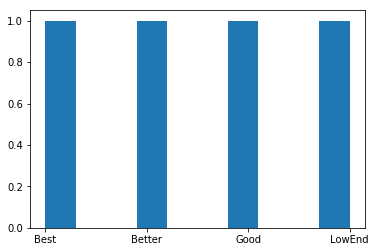

In [72]:
# Randomly select a list of Products Sold (restricted by setting probability)
#Product=["LowEnd","Good","Better","Best"]
#x=np.random.choice(Product,500,p=[0.15,0.35,0.30,0.20]) #p sets the probability
#np.random.seed(124)
plt.hist(prod)
plt.show()



In [73]:
countries = {"UK", "Germany", "France", "Netherlands", "Spain"}
df['Country'] = np.random.choice(list(countries), len(df))
df.head(3)

,Product,Country,MLT,LLT
1,LowEnd,Netherlands,NaN,NaN
2,Better,France,NaN,NaN
3,Better,Netherlands,NaN,NaN


Now I want to associate the Target Leadtime Days to both the Product MT and LLT - I am doing this using the map function....  "Pandas’ map function lets you add a new column with values from a dictionary if the data frame has a column matching the keys in the dictionary" http://cmdlinetips.com/2018/01/how-to-add-a-new-column-to-using-a-dictionary-in-pandas-data-frame/

In [74]:
#Using map function
#Aligning the Product Offering to its associated Target Leadtime
MLT_Target={"LowEnd":2,"Good":3,"Better":5,"Best":6}
df['MLT']= df['Product'].map(MLT_Target)
# Aligning the Product Offering to its associated Target Leadtime
LLT_Target={"UK":2, "Germany":4, "France":3, "Netherlands":3, "Spain":5}
df['LLT']= df['Country'].map(LLT_Target)
df['Total Target LT'] = (df.MLT + df.LLT)
df.head()

,Product,Country,MLT,LLT,Total Target LT
1,LowEnd,Netherlands,2,3,5
2,Better,France,5,3,8
3,Better,Netherlands,5,3,8
4,Good,Germany,3,4,7
5,Good,UK,3,2,5


In order to ensure I get a positive vlaue for the random selection of Manufacturing and Logistic LTs I decided between the Poissin and Gamma distribution. In this case the gamma distribution is used

In [76]:
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
df['Actual_MLT'] = np.random.gamma(shape, scale, len(df))
df.head(3)

,Product,Country,MLT,LLT,Total Target LT,Actual_MLT
1,LowEnd,Netherlands,2,3,5,4.891269
2,Better,France,5,3,8,3.366797
3,Better,Netherlands,5,3,8,1.158626


https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.html


In [ ]:
y=np.random.randint(-1,6,1000)
# randn gives a normal distribution which is what i would expect here

In [ ]:
plt.hist(y)
plt.show()

In [ ]:
np.random.random_integers(5)

In [ ]:
y

In [49]:
df2

,0
2018-09-29,-1.050170
2018-09-30,1.914906
2018-10-01,0.161341
2018-10-02,0.601803
2018-10-03,-1.429715
2018-10-04,-0.483708
2018-10-05,-0.456037
2018-10-06,-1.693302
2018-10-07,-0.031606
2018-10-08,-0.260151
